In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/home/artur/ml_shared/week4/Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")


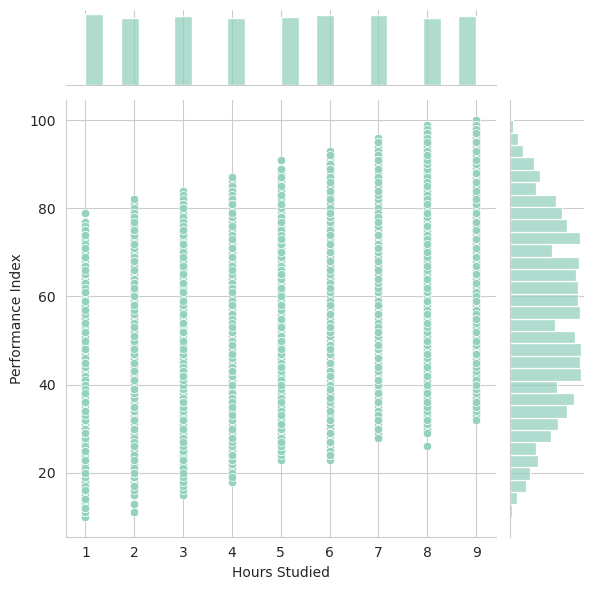

In [7]:
sns.jointplot(x="Hours Studied", y="Performance Index", data=df)

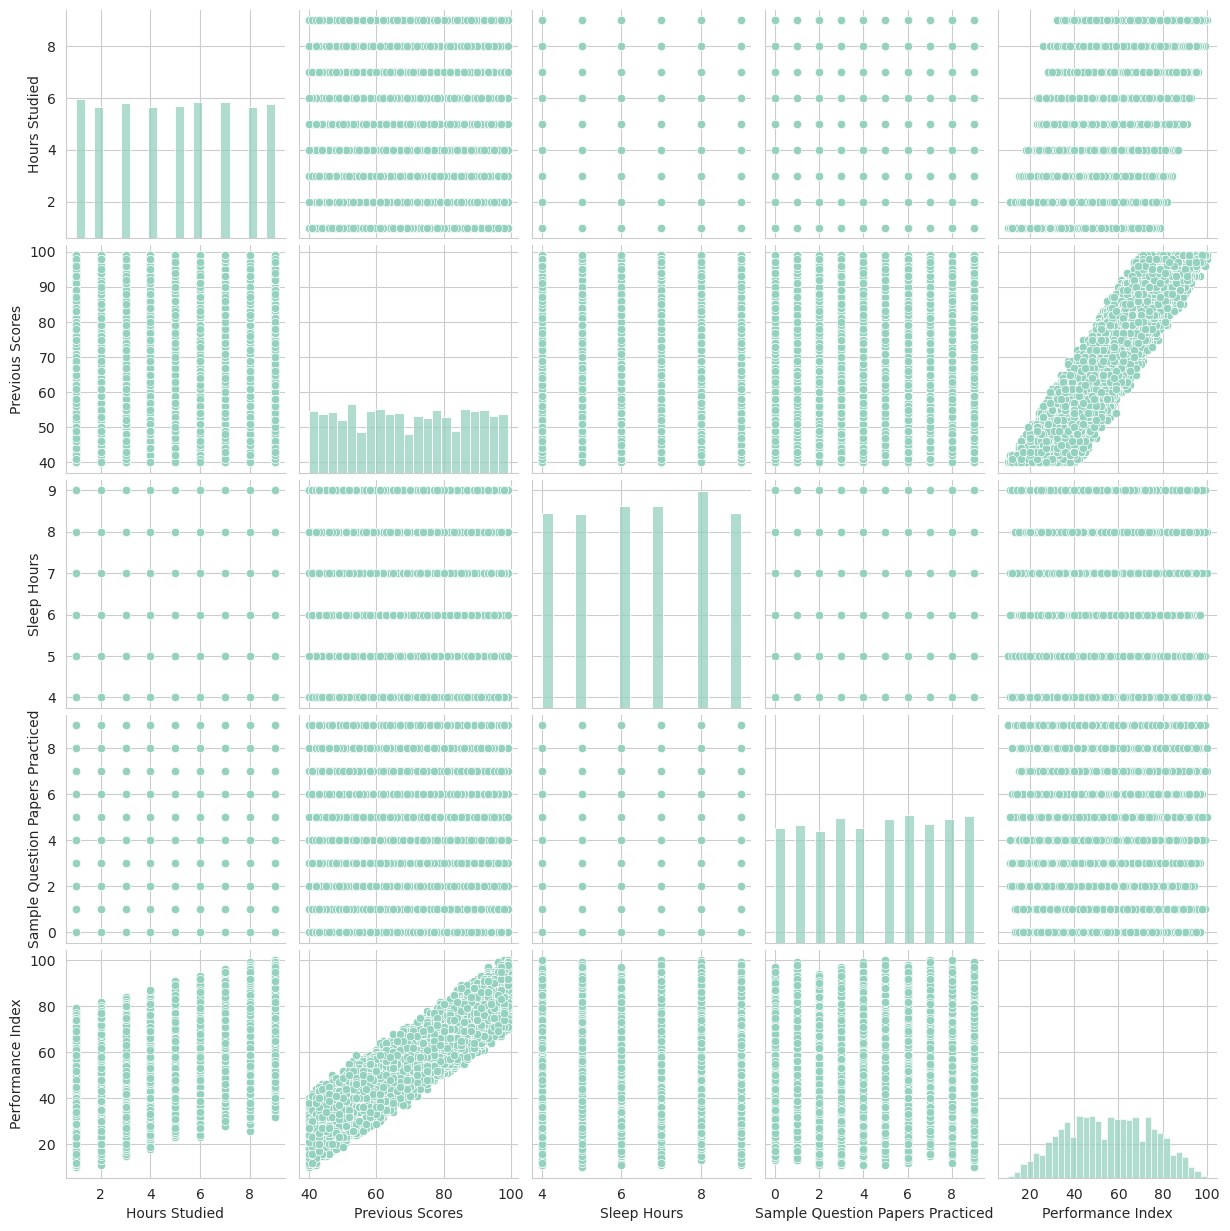

In [8]:
sns.pairplot(df)

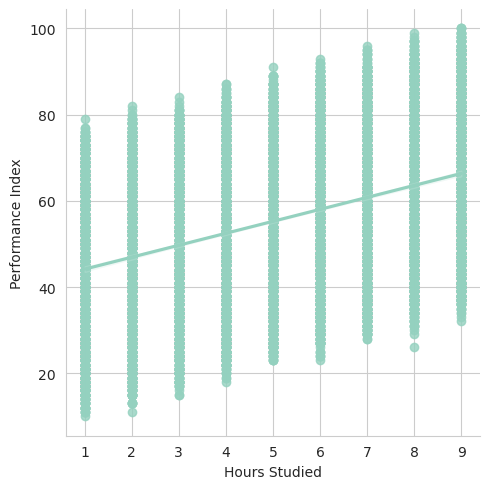

In [9]:
sns.lmplot(x="Hours Studied", y="Performance Index", data=df)

In [11]:
# Training Sets


In [12]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [14]:
X = df[["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]]
y = df["Performance Index"]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
X_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
9254,5,49,7,5
1561,2,48,7,6
1670,2,81,7,2
6087,2,46,6,1
6669,8,47,9,0
...,...,...,...,...
5734,8,50,6,6
5191,4,68,9,3
5390,9,48,7,6
860,1,47,9,0


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linear_model = LinearRegression()

In [19]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [20]:
print("Coef: ", linear_model.coef_)

Coef:  [2.85289351 1.01703572 0.47331832 0.19172629]


In [23]:
predictions = linear_model.predict(X_test)

Text(0, 0.5, 'Predicated Y')

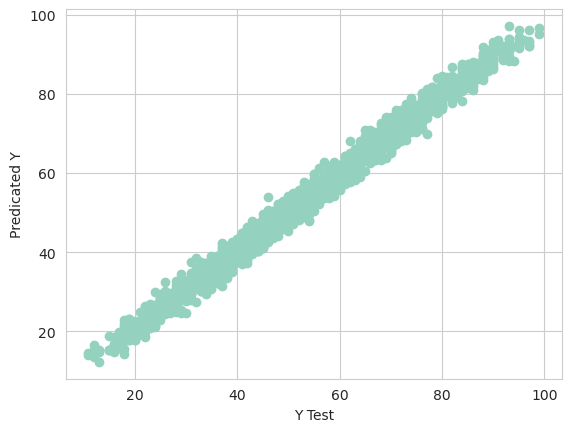

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel("Y Test")
plt.ylabel("Predicated Y")

In [25]:
from sklearn import metrics

In [26]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("MAE: ", np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE:  1.6296726874197016
MSE:  4.182254914593815
MAE:  1.276586341545178


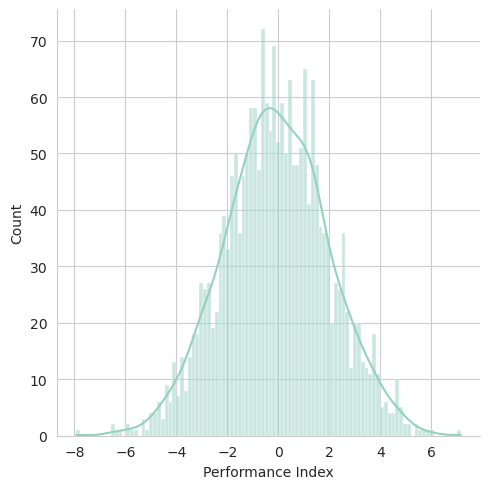

In [27]:
sns.displot((y_test - predictions), bins=100, kde=True)